<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/03-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal

En esta notebook exploraremos la regresión lineal (RL) aplicándo este algoritmo a varios conjuntos de datos. Además, usaremos la regresión lineal multiple y polinomial.

Trabajaremos 3 ejemplos:

1. Regresión Lineal Simple
2. Regresión Lineal Multiple
3. Regresión con Regularización

La **RL** es el modelo más simple para entender los problemas de regresión. Este tipo de modelos son muy populares debido a que:

  - Son *baratos* y *rápidos* de estimar.
  - Son **INTERPRETABLES**.

El caso base de una RL consiste en ajustar una linea a un conjunto de puntos (1 variable independiente, 1 variable dependiente). Este modelo se puede extender a comportamientos más complicados (más dimensiones o relaciones no lineales).

## Ejemplo 1: Regresión Lineal Simple

Una Regresión Lineal Simple, es una linea en 2D que es **ajustada** a datos y tiene la siguiente forma:

\begin{equation}
y=\beta_0+\beta_1x_1,
\end{equation}

tal que $y$ es la variable dependiente (etiqueta/salida) y $\mathbf{x}$ son las variable independiente (feature).

$\beta_0$ es la *ordenada al origen* (*intercepto*) y $\beta_1$ es la *pendiente* de la linea (*coeficiente*).

Generaremos datos sintéticos que provienen de una linea con $\beta_0=2$ y $\beta_1=5$. Este ejemplo será útil para desarrollar la intuición detrás del método.

In [ ]:
import numpy as np

np.random.seed(55) # Fijamos el 'seed', para la reproducibilidad.
size = 100

b0 = 2
b1 = 5

x = np.random.uniform(0,3,size)
y_recta = (b0 + (b1 * x))       # coordenadas y sobre la recta
ruido = np.random.normal(0,1,size)
y = y_recta + ruido             # Distribución Normal

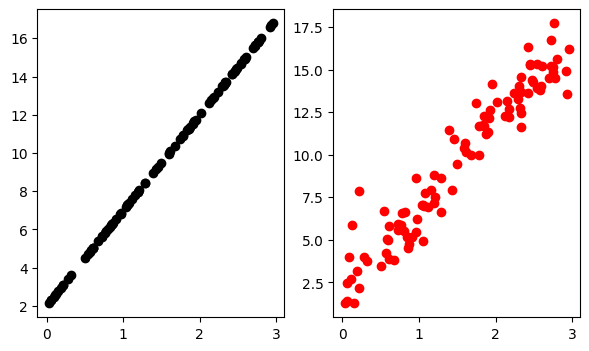

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plt.scatter(x,y_recta,color='black')
plt.subplot(1,2,2)
plt.scatter(x,y,color='red')
plt.show()

<iframe scrolling="no" title="Regresión Lineal" src="https://www.geogebra.org/material/iframe/id/sv32x27d/width/700/height/500/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/false/rc/false/ld/false/sdz/true/ctl/false" width="700px" height="500px" style="border:0px;"> </iframe>

### Solución usando OLS

Para ejemplificar, volvamos a una variable independiente. El **ajuste óptimo** se puede determinar de varias formas, pero la manera más común (y la utilizada por `Scikit-Learn`) es mediante el **método de OLS**, el cual minimiza una cantidad denominada *suma de cuadrados de los residuos* (RSS):

\begin{align}
RSS(\hat{\beta_0},\hat{\beta_1}) &= \sum_{i=1}^n [y_i - (\hat{\beta_0}+\hat{\beta_1} x_i)]^2,\\
\end{align}

en esta ecuación el **residuo** corresponde al valor $e_i$, tal que $e_i=y_i - (\hat{\beta_0}+\hat{\beta_1} x_i)$. Geométricamente, un residuo es la distancia vertical entre la **linea ajustada** y el valor real $y_i$.

<img src="https://docs.google.com/uc?export=download&id=13gFpVnLx56mrQ1j4pGuZFlfXVl-EkoJK" width="600" align="middle">



In [ ]:
#@title
##@title Applet de geogebra

import IPython

iframe = '<iframe scrolling="no" title="Regresión Lineal" src="https://www.geogebra.org/material/iframe/id/sv32x27d/width/700/height/500/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/false/rc/false/ld/false/sdz/true/ctl/false" width="700px" height="500px" style="border:0px;"> </iframe>'

IPython.display.HTML(iframe)

Otra precisión importante, es que OLS produce estimados de los parámetros, es decir que se obtienen $\hat{\beta_0}$ y $\hat{\beta_1}$, y no los verdaderos $\beta_0$ y $\beta_1$.

**Representación Algebraica**

Un modelo de regresión lineal para una sola variable independiente, lo podemos escribir como un sistema de ecuaciones lineales utilizando matrices de la siguiente forma:

$$
\begin{bmatrix}
y_1 \\ y_2 \\ \dots \\ y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
1 & \dots \\
1 & x_{n}
\end{bmatrix}
\begin{bmatrix}
\hat{\beta}_0 \\
\hat{\beta}_1 \\
\end{bmatrix}
+
\begin{bmatrix}
e_0 \\
e_1 \\
\dots \\
e_n
\end{bmatrix}
=
X\hat{\beta}+\mathbf{e}
$$

**Geométricamente**

Como ya lo dijimos, buscamos minimizar la distancia entre la $\mathbf{y}$ y nuestra estimación $X\hat{\beta}$. Sin embargo, $\mathbf{y}=X\hat{\beta}$ solo es posible en raras ocasiones y lo que usualmente podemos lograr es $\mathbf{y}\approx X\hat{\beta}$. Esto significa que $X\hat{\beta}$ yace en el **espacio de características** mientras que $\mathbf{y}$ no, por lo tanto, existe una diferencia (vector de residuos $\mathbf{e}$). La siguiente figura ejemplifica esta relación para 2 variables independientes:

<img src="https://docs.google.com/uc?export=download&id=1y3sInYKdSv5uFEvk-f01S-omV-T9JBTV" width="600" align="middle">

**Estimación de las $\hat{\beta}$s**

En este sentido, para estimar las $\hat{\beta}$s sus valores deben ser tales que el vector $\mathbf{e}=\mathbf{y}-X\hat{\beta}$ sea **perpendicular** (ortogonal en N dimensiones) al espacio de caracteristicas de $X$.

Dado que dos vectores $u$ y $v$, son ortogonales si $\mathbf{u}^T\mathbf{v}=u_1v_1+u_2v_2+\ldots+u_nv_n=0$. Entonces, $\mathbf{e}$ es ortogonal a $X$ si $\mathbf{e}$ es ortogonal a cada vector columna de $X$. Esto es

\begin{align}
(\mathbf{y}-X\hat{\beta})^T X=0,\\
\mathbf{e}^T X=0
\end{align}

De lo anterior se sigue:

\begin{align}
X^T (\mathbf{y}-X\hat{\beta}) &=0 \Leftrightarrow \\
X^T\mathbf{y} - X^TX\hat{\beta} &= 0 \Leftrightarrow \\
X^T\mathbf{y} &= X^TX\hat{\beta}  \Leftrightarrow \\
(X^T X)^{-1} X^T\mathbf{y} &= \hat{\beta} \\
\end{align}

### Implementación manual

🔵 Primero, añadimos el vector columna de 1s. Obtener la matriz

\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
1 & \dots \\
1 & x_{n}
\end{bmatrix}

Acerca de la concatenación arreglos: https://stackoverflow.com/questions/33356442/when-should-i-use-hstack-vstack-vs-append-vs-concatenate-vs-column-stack

In [ ]:
print(x[:5])

[0.27932486 2.91496776 1.45157994 0.7275681  1.59337149]


In [ ]:
X = np.column_stack((np.ones(shape=x.shape),x))

print(X[:5,:])

assert X.shape == (size,2)

[[1.         0.27932486]
 [1.         2.91496776]
 [1.         1.45157994]
 [1.         0.7275681 ]
 [1.         1.59337149]]


🔵 Resolver usando mínimos cuadrados (OLS). Es decir,

$$\hat{\beta} = (X^T X)^{-1} X^T\mathbf{y}$$

In [ ]:
beta = (np.linalg.inv(np.transpose(X)@X)@np.transpose(X))@y
print(beta.shape)

beta_0 = beta[0]
beta_1 = beta[1]

print(beta_0,beta_1)

(2,)
2.173933704653071 4.869599646830459


🔵 Visualicemos la línea ajustada

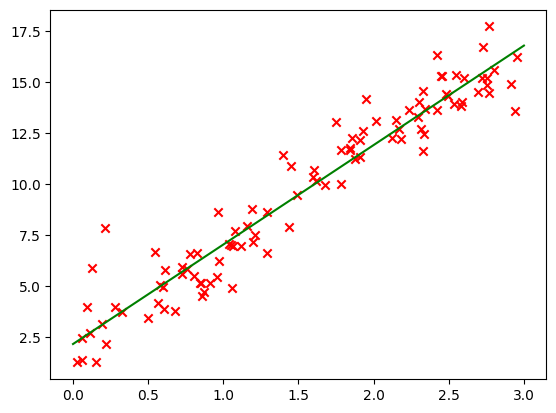

In [ ]:
x_values = np.linspace(0, 3, 100)       # Dividimos el intérvalo [0,3] en 100 puntos equi-espaciados
y_values = beta_0 + beta_1 * x_values

plt.figure()
plt.scatter(x, y, marker='x',color='red')
plt.plot(x_values, y_values, color='green')
plt.show()

### Implementación con `scikit-learn`

In [ ]:
x = x.reshape(-1,1)
x.shape

(100, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)

LinearRegression()

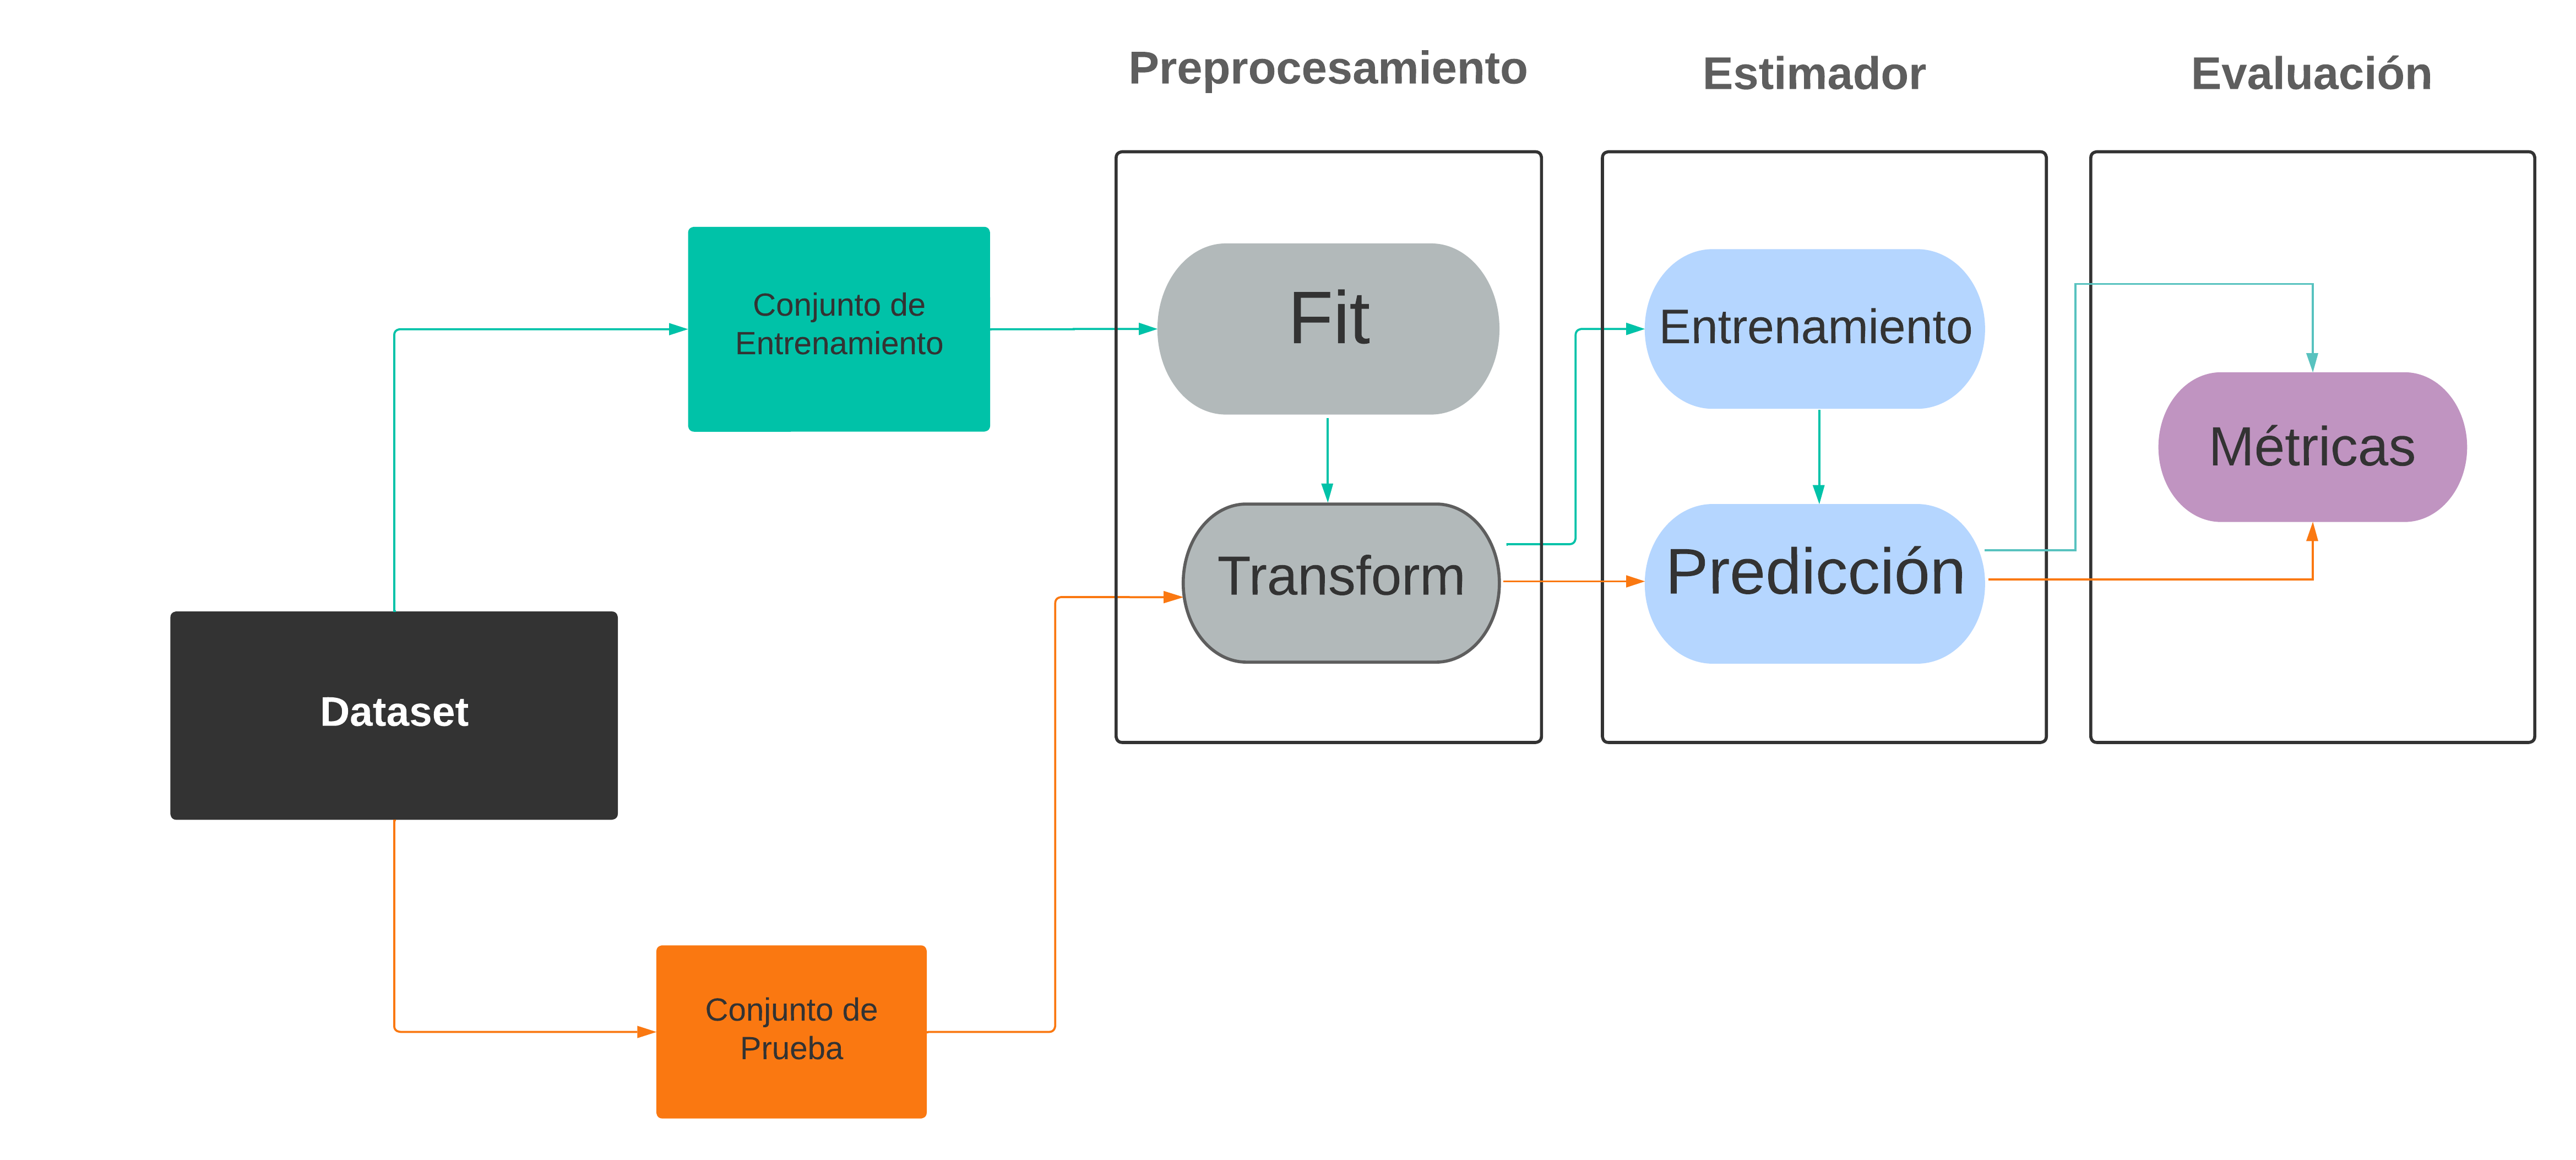Por convención, en Scikit-Learn todos los parámetros del modelo que se aprendieron durante el proceso `fit()` son nombrados con guiones bajos al final. En este modelo podemos recuperar los valores de $\beta_0$ (el intercepto) y $\beta_1$ (el coeficiente).

In [ ]:
lr.intercept_

2.173933704653062

In [ ]:
lr.coef_

array([4.86959965])

Realizamos predicciones

In [ ]:
beta_0 = lr.intercept_
beta_1 = lr.coef_

y_values = beta_0 + beta_1 * x_values

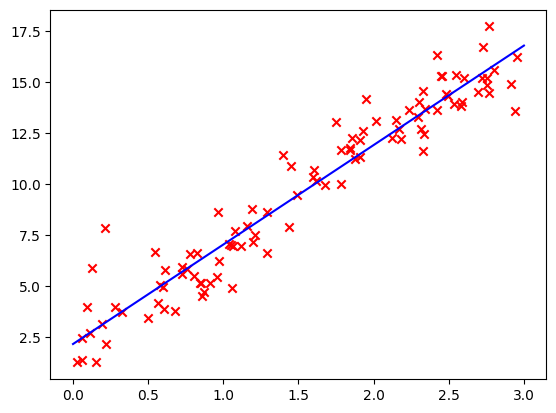

In [ ]:
x_values = np.linspace(0, 3, 100)

plt.figure()
plt.scatter(x, y, marker='x',color='red')
plt.plot(x_values, y_values, color='blue')
plt.show()

### Condiciones

La regresión lineal tiene varias suposiciones:

* **Linealidad**: la relación entre $X$ y $y$ es lineal. En nuestro ejemplo, así construimos los datos.
* **Independencia**: las observaciones son independientes entre sí.
* **Normalidad**: los residuos, $e_i$ se distribuye normalmente.
$$e_i \sim \mathcal{N}(\mu,\,\sigma^{2})$$





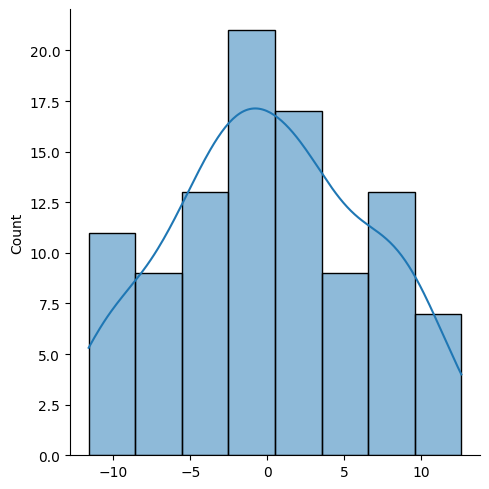

In [ ]:
import seaborn as sns

residuos = y - y_values

sns.displot(residuos, kde=True)
plt.show()

**¿Qué quiere decir que los residuos se distribuyen normalmente?**

**¿Qué pasa si no se satisface la hipótesis de la normalidad de los residuos?**

*Misspecifying the Shape of a Random Effects Distribution: Why Getting It Wrong May Not Matter*, Statistical Science, 2011, Vol. 26, No. 3, 388–402

**¿Qué pasa si el ruido que contamina la serie de tiempo NO es normal?**

Considere que los siguientes datos sintéticos provienen de una linea con $\beta_0=2$ y $\beta_1=5$. Los cuatro conjuntos de datos son contaminados por diferentes fuentes de ruido:

- Distribución Beta $P(x:\alpha,\beta) = \frac{\Gamma(\alpha +\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1 -x)^{\beta - 1}$

- Distribución uniforme $P(x:a,b)=\frac{1}{b-a}\mid a\geq x\geq b$

- Distribución Logarítmica $P(x: p,k\geq1)=\frac{-1}{ln(1-p)}\frac{p^k}{k}$

- Distribución Log-Normal $P(x: \mu,\sigma) = \frac{1}{x}\cdot \frac{1}{\sigma \sqrt{2\pi}} exp(\frac{(ln(x)-\mu)^2}{2\sigma^2})$

In [ ]:
import numpy as np

np.random.seed(55) # Fijamos el 'seed', para la reproducibilidad.
size = 100

b0 = 2
b1 = 5

x = np.random.uniform(0,3,size)
y_recta = (b0 + (b1 * x))       # coordenadas y sobre la recta

y_beta = y_recta + 3*np.random.beta(a=2,b=5, size=size)   # Distribución Beta
y_unif = y_recta + 3*np.random.uniform(low=-3, high = 3, size = size) # Distribución uniforme
y_logs = y_recta + 3*np.random.logseries(p=.66, size = size) # Distribución logaritmica
y_lognorm = y_recta + 3*np.random.lognormal(size=size) # Distribución log-nor

🔵 Exploremos el comportamiento de la regresión en estas situaciones.

1. Realizamos las regresiones y las graficamos en un grid de 2x2
2. Graficamos los histogramas de los residuos en un grid de 2x2

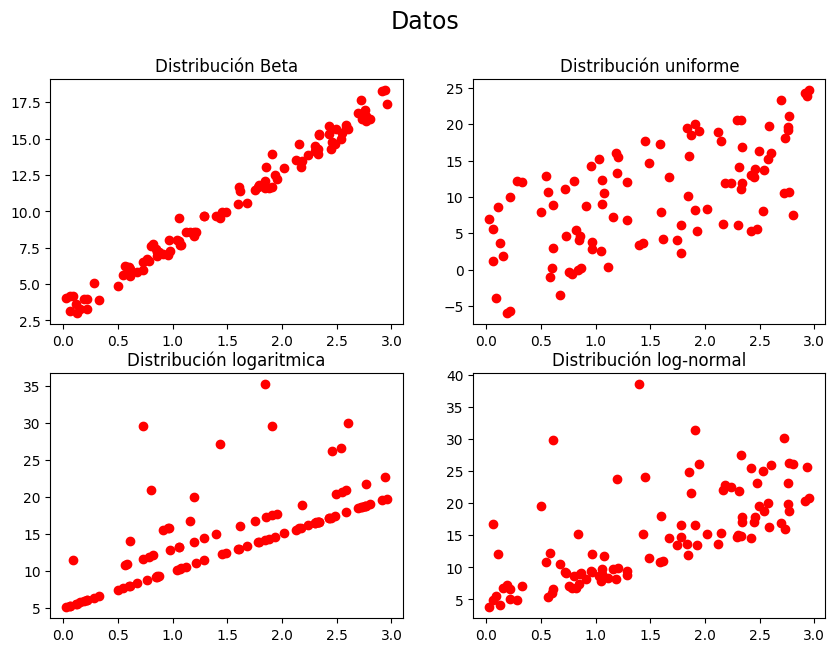

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(10,7))
fig.suptitle("Datos", fontsize=17)
axs[0, 0].scatter(x, y_beta, color='red')
axs[0, 0].set_title('Distribución Beta')
axs[0, 1].scatter(x, y_unif, color='red')
axs[0, 1].set_title('Distribución uniforme')
axs[1, 0].scatter(x, y_logs, color='red')
axs[1, 0].set_title('Distribución logaritmica')
axs[1, 1].scatter(x, y_lognorm, color='red')
axs[1, 1].set_title('Distribución log-normal')
fig.show()

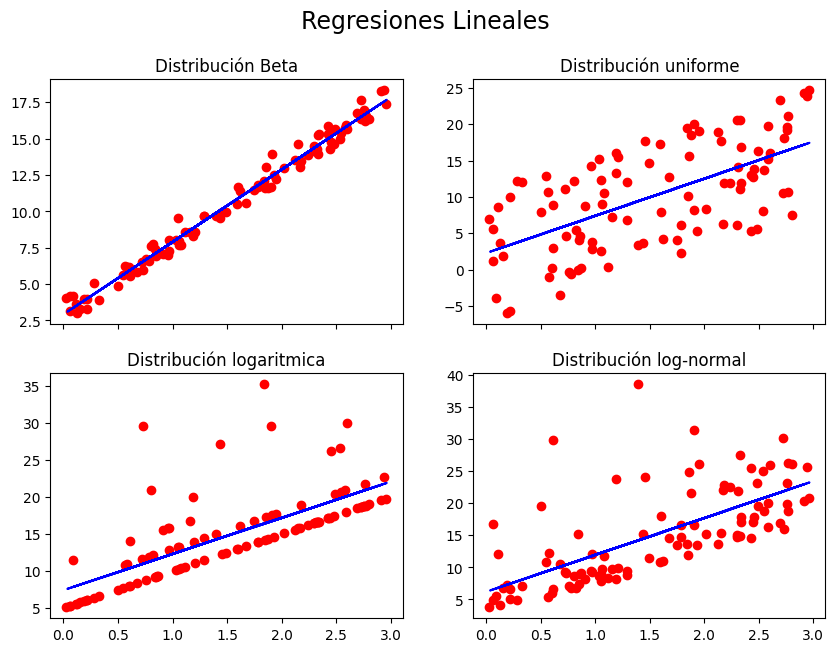

In [ ]:
arreglos_y = [y_beta, y_unif, y_logs, y_lognorm]
titulos = ['Distribución Beta', 'Distribución uniforme', 'Distribución logaritmica', 'Distribución log-normal']

x_values = np.random.uniform(0,3,size)

fig, axs = plt.subplots(2, 2,figsize=(10,7),sharex=True)
fig.suptitle("Regresiones Lineales", fontsize=17)

for j,ax in enumerate(axs.flatten()):
    lr = LinearRegression()
    lr.fit(x.reshape(-1,1),arreglos_y[j])
    b0 = lr.intercept_
    b1 = lr.coef_
    ax.scatter(x, arreglos_y[j], color='red')
    ax.plot(x_values, b0 + b1*x_values, color='blue')
    ax.set_title(titulos[j])
fig.show()

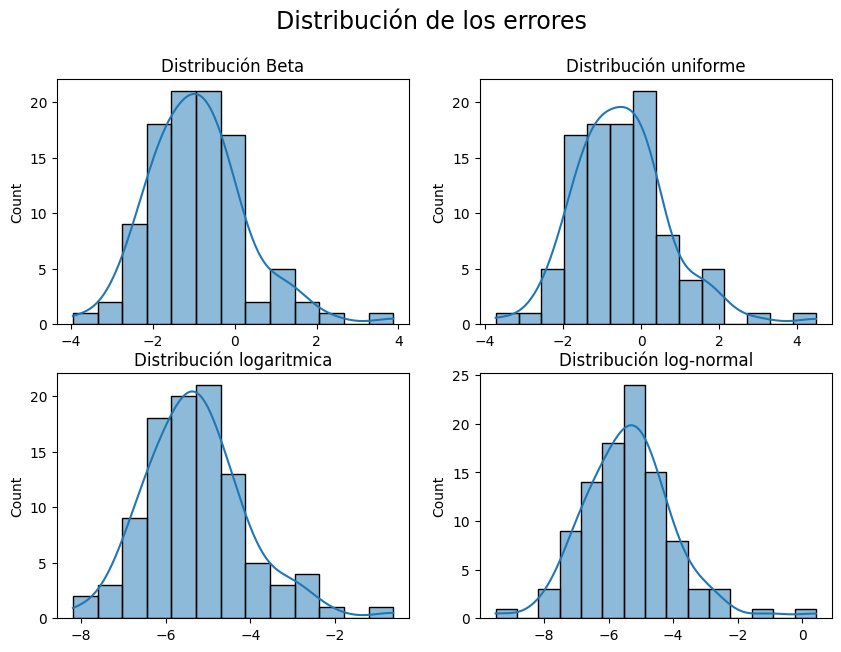

In [ ]:
import seaborn as sns

arreglos_y = [y_beta, y_unif, y_logs, y_lognorm]
titulos = ['Distribución Beta', 'Distribución uniforme', 'Distribución logaritmica', 'Distribución log-normal']

x_values = np.random.uniform(0,3,size)

fig, axs = plt.subplots(2, 2,figsize=(10,7))
fig.suptitle("Distribución de los errores", fontsize=17)

for j,ax in enumerate(axs.flatten()):
    lr = LinearRegression()
    lr.fit(x.reshape(-1,1),arreglos_y[j])
    b0 = lr.intercept_
    b1 = lr.coef_
    residuos = y - (b0 + b1*x)
    sns.histplot(residuos, kde=True, ax=ax)
    ax.set_title(titulos[j])
fig.show()

## Ejemplo 2: Regresión Lineal Multiple

Usaremos un dataset de precios de automóviles. Una empresa automovilística china aspira a entrar en el mercado estadounidense estableciendo allí su unidad de fabricación y produciendo coches localmente para hacer la competencia a sus homólogos estadounidenses y europeos.

La empresa quiere conocer los factores que afectan al precio de los coches en el mercado estadounidense, ya que pueden ser muy diferentes de los del mercado chino. La empresa quiere saber:

* Qué variables son significativas para predecir el precio de un coche.
* En qué medida esas variables describen el precio de un coche

Basándose en varios estudios de mercado, la consultora ha reunido este conjunto de datos sobre distintos tipos de coches en el mercado estadounidense. Más información sobre el dataset: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/cars-prices.csv'
df = pd.read_csv(url)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Preprocesamiento

Quitamos algunas variables no relevantes

In [ ]:
df.drop(columns=['car_ID','CarName'],inplace=True)
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(f"Forma del dataframe\nInstancias:{df.shape[0]}\nFeatures:{df.shape[1]}")

Forma del dataframe
Instancias:205
Features:24


Nombres de las columnas

In [ ]:
df.columns.to_list()

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

Podemos ver que no hay datos faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [ ]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Inspeccionemos las *features* que contienen datos no numéricos

In [ ]:
columns_object = df.select_dtypes('object').columns.to_list()
len(columns_object),columns_object

(9,
 ['fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'enginetype',
  'cylindernumber',
  'fuelsystem'])

Hagamos un conteo de los valores únicos en cada una de las *features* categóricas

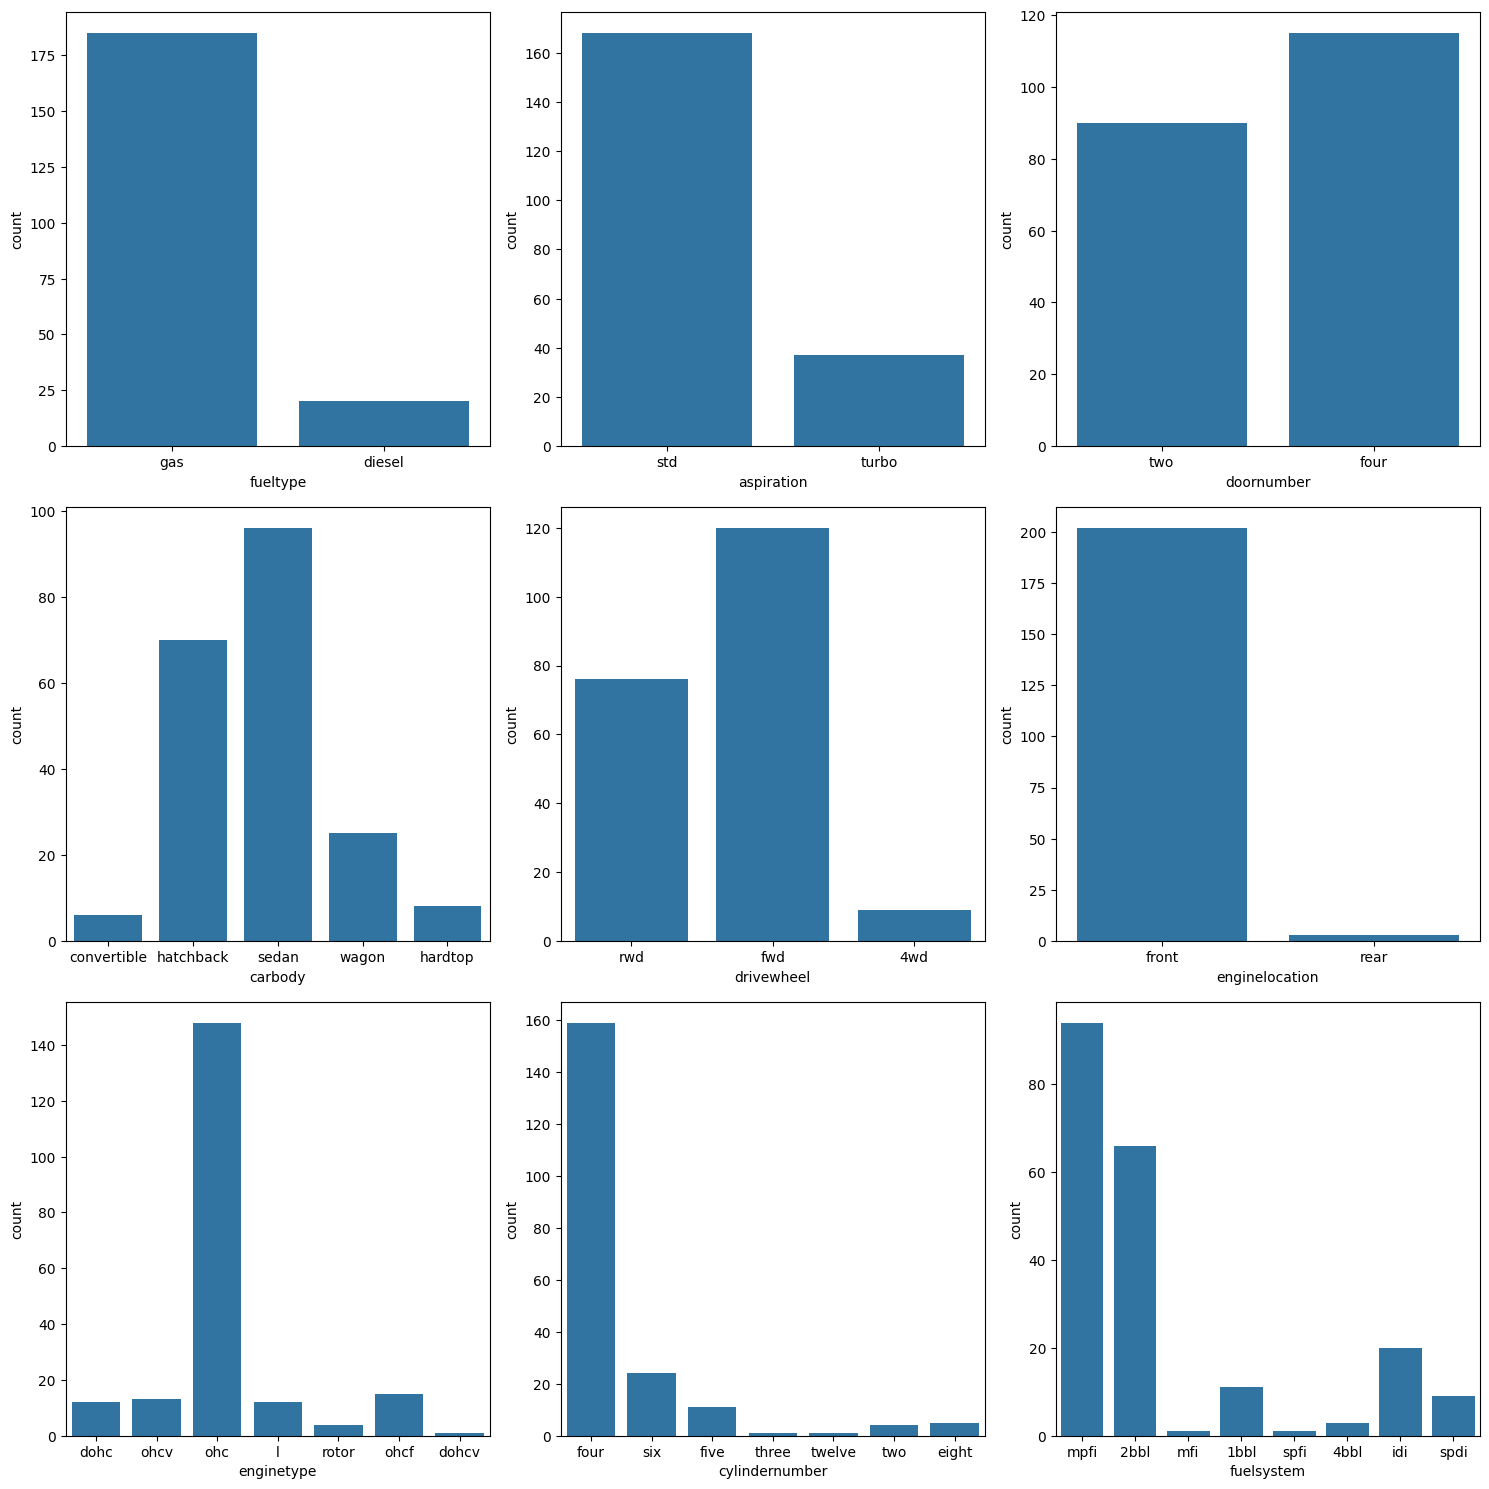

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,15))
for idx,col_name in enumerate(columns_object):
    plt.subplot(3,3,idx+1)
    sns.countplot(x=df.loc[:,col_name])
plt.tight_layout()
plt.show()

⭕ Reemplazar los datos de las columnas `cylindernumber` y `doornumber` con número. Las convertimos a variables numéricas

In [ ]:
cols = ['cylindernumber','doornumber']
replacing_dict = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}

for col in cols:
    df[col].replace(replacing_dict,inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Inspeccionemos las relaciones entre las variables (features) y el precio.

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight']


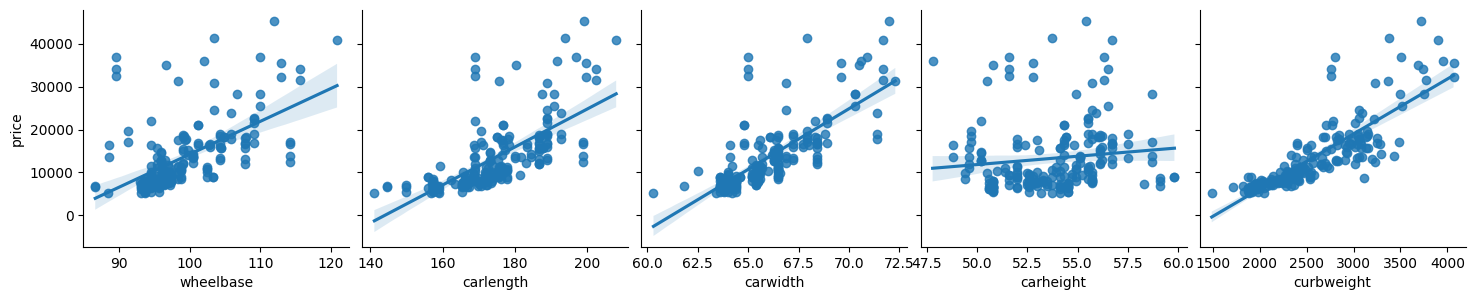

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns.to_list()[7:12])
sns.pairplot(df, x_vars=df.columns.to_list()[7:12], y_vars='price', height=3, aspect=1, kind='reg')
plt.show()

Separamos la variable de salida y preparamos las variables predictoras. Recordemos la convención de usar `y` para el vector de valores/etiquetas.

In [ ]:
y = df['price'].values
print(y.shape)

(205,)


Quitamos la columna `pice` del dataframe

In [ ]:
df.drop(columns='price',inplace=True)

Hacemos la codificación *one-hot* para las variables categóricas

In [ ]:
X_df = pd.get_dummies(df)
X_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,True,False,False,False,False,False,False,True,False,False
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,False,False,False,False,False,False,False,True,False,False


Definimos la matriz de features. La convención es usar `X`:

In [ ]:
X = X_df.values
print(X.shape)

(205, 45)


Dividimos los datos en entrenamiento (train) y prueba (test) con una proporción 80%/20%. Usualmente utilizaremos la función [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). La convención es nombrar:

* `X_train`
* `X_test`
* `y_train`
* `y_test`

**¡Cuidado con el data leakage!**

<img src="https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/img/ML-proceso.png">

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((164, 45), (164,))
Prueba: ((41, 45), (41,))


Podríamos realizar una selección de *features*.

* [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). Selecciona las variables (features) con varianza mayor que el umbral indicado.
* [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html). Selecciona las variables (features) que mejor expliquen la variable target (salida/etiqueta). **Cuidado con la función score que se usa.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
X_train = selector.fit_transform(X_train)   # Entrenamos y transformamos el de entrenamiento
X_test = selector.transform(X_test)        # Sólo transformamos el de prueba
print(f"Teníamos {X.shape[1]} variables originalmente, nos quedamos con {len(selector.get_feature_names_out())}")
print(f"Variables originales:\n{X_df.columns.to_list()}\n")
print(f"Variables con las que nos quedamos:\n{selector.get_feature_names_out()}\n")

Teníamos 45 variables originalmente, nos quedamos con 45
Variables originales:
['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']

Variables con las que nos quedamos:
['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14' 'x15' 'x16' 'x17' 'x18' 'x19' 'x

Hacemos normalización.

* [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#---- Esto es sólo para visualizar ----
print(X_train[:3,:5])

[[ 0.11987823 -1.15881713 -0.85036632 -1.99890916 -0.90148343]
 [-1.45292411  0.86294893  0.80679017  0.06528637 -0.62050158]
 [-0.66652294  0.86294893  0.30619082  0.66105013  0.26927427]]


### Entrenamiento



In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Veamos el coeficiente de determinación del desempeño en el conjunto de prueba. Este es el coeficiente `R2`

In [ ]:
lr.score(X_train,y_train)

0.9301854589787872

Veamos cómo lo hace en el conjunto de prueba

In [ ]:
lr.score(X_test,y_test)

0.8858567207262613

### Predicciones

Predecimos usando las variables predictoras del conjunto de prueba

In [ ]:
y_pred_test = lr.predict(X_test)

Veamos cómo se ven las predicciones

In [ ]:
print(f"Valores de prueba:\n{y_test[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_test[:5],2)}")

Valores de prueba:
[45400. 35550.  6377.  7957.  7126.]
Valores predichos:
[36271.07 31959.56  5533.75  6614.1   8033.99]


Representemos gráficamente esta comparación

In [ ]:
y_pred_train = lr.predict(X_train)

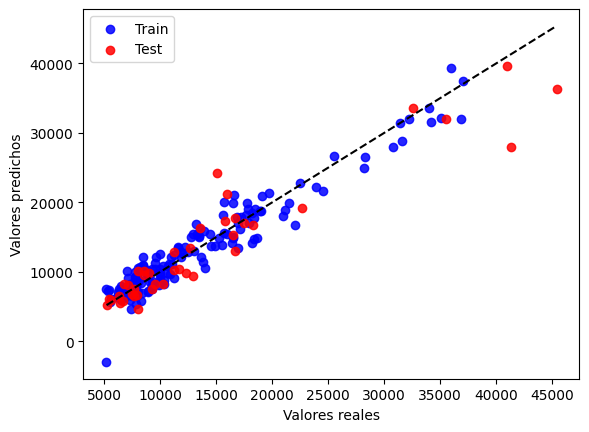

In [ ]:
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

plt.figure(dpi=100)
plt.scatter(y_train, y_pred_train, c='blue',alpha=0.85,label='Train')
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85,label='Test')
plt.plot(xaxis,xaxis,'k--')  # La línea de referencia y_pred=y_real
plt.legend(loc='best')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

Podemos usar otras métricas de rendimiento.

Más información: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f"MAE en el conjunto de prueba: {mean_absolute_error(y_test,y_pred_test)}")  # Esta es muy interpretativa
print(f"MSE en el conjunto de prueba: {mean_squared_error(y_test,y_pred_test)}")

MAE en el conjunto de prueba: 2234.6689492426285
MSE en el conjunto de prueba: 11944281.55828136


También podemos comparar usando los valores de entrenamiento

In [ ]:
print(f"R2 en el entrenamiento: {lr.score(X_train,y_train)}")
print(f"R2 en la prueba: {lr.score(X_test,y_test)}")

print(f"MAE en el conjunto de entrenamiento: {mean_absolute_error(y_train,y_pred_train)}")  # Esta es muy interpretativa
print(f"MSE en el conjunto de entrenamiento: {mean_squared_error(y_train,y_pred_train)}")

R2 en el entrenamiento: 0.9301854589787872
R2 en la prueba: 0.8858567207262613
MAE en el conjunto de entrenamiento: 1478.9548683577607
MSE en el conjunto de entrenamiento: 3692070.722965263


### Interpretación de los resultados

Recuerda que el objetivo de la ciencia de datos es proporcionar información para la toma de decisiones a partir del exploración y modelaje de los datos.

En este caso, ¿qué variables son más importantes para determinar el precio de un vehículo?

Podemos acceder a los coeficientes de la regresión. Vemos que hay un coeficiente por cada feature.

In [ ]:
print(lr.coef_.shape)
print(lr.coef_)

(45,)
[  820.05315001   274.64090263  1008.31600025  -680.64874655
  1188.11428083   551.43290119  2310.75739088  -117.37505832
  4649.92991622 -1561.76120588 -1490.83515853 -5008.0043608
   893.02141709   643.75948176   -86.87376216  1046.82214528
  1630.75712863 -1630.75712863  -235.28825678   235.28825678
   592.05304693  -112.52839712  -118.50468233   177.50456013
  -408.78263533  -219.78756159  -363.99322995   455.57075804
  -625.95976919   625.95976919  -190.00152816   216.23294652
  -871.4390162    542.00119943   107.32506789  -953.43079906
  1294.89037835   -66.65235132  -319.21321991  -230.03606911
  1630.75712863  -271.43663604  -375.44542435  -651.76921785
  -112.95939065]


Los organizamos con el nombre de cada *feature*

In [ ]:
pd.DataFrame(lr.coef_.reshape(1,-1),columns=X_df.columns)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,820.05315,274.640903,1008.316,-680.648747,1188.114281,551.432901,2310.757391,-117.375058,4649.929916,-1561.761206,...,-953.430799,1294.890378,-66.652351,-319.21322,-230.036069,1630.757129,-271.436636,-375.445424,-651.769218,-112.959391


Veamos cuales tienen más peso

In [ ]:
columns = X_df.columns.to_list()
coefs_dict = dict(zip(columns,lr.coef_))
coefs_dict

{'symboling': 820.0531500146063,
 'doornumber': 274.6409026290635,
 'wheelbase': 1008.3160002528991,
 'carlength': -680.6487465465594,
 'carwidth': 1188.1142808269246,
 'carheight': 551.4329011925641,
 'curbweight': 2310.7573908796508,
 'cylindernumber': -117.3750583212566,
 'enginesize': 4649.929916218584,
 'boreratio': -1561.7612058809796,
 'stroke': -1490.8351585330895,
 'compressionratio': -5008.004360801236,
 'horsepower': 893.0214170939053,
 'peakrpm': 643.7594817611754,
 'citympg': -86.87376215761351,
 'highwaympg': 1046.822145277201,
 'fueltype_diesel': 1630.7571286323769,
 'fueltype_gas': -1630.7571286323741,
 'aspiration_std': -235.28825677741855,
 'aspiration_turbo': 235.2882567774139,
 'carbody_convertible': 592.0530469345593,
 'carbody_hardtop': -112.52839712434898,
 'carbody_hatchback': -118.5046823266728,
 'carbody_sedan': 177.5045601269504,
 'carbody_wagon': -408.7826353318122,
 'drivewheel_4wd': -219.7875615877436,
 'drivewheel_fwd': -363.99322995191255,
 'drivewheel_r

In [ ]:
dict(sorted(coefs_dict.items(),key=lambda x:x[1],reverse=True))

{'enginesize': 4649.929916218584,
 'curbweight': 2310.7573908796508,
 'fueltype_diesel': 1630.7571286323769,
 'fuelsystem_idi': 1630.7571286323753,
 'enginetype_rotor': 1294.8903783532435,
 'carwidth': 1188.1142808269246,
 'highwaympg': 1046.822145277201,
 'wheelbase': 1008.3160002528991,
 'horsepower': 893.0214170939053,
 'symboling': 820.0531500146063,
 'peakrpm': 643.7594817611754,
 'enginelocation_rear': 625.9597691897953,
 'carbody_convertible': 592.0530469345593,
 'carheight': 551.4329011925641,
 'enginetype_ohc': 542.0011994332611,
 'drivewheel_rwd': 455.57075804439455,
 'doornumber': 274.6409026290635,
 'aspiration_turbo': 235.2882567774139,
 'enginetype_dohcv': 216.23294651536816,
 'carbody_sedan': 177.5045601269504,
 'enginetype_ohcf': 107.32506789098,
 'fuelsystem_1bbl': -66.65235132239768,
 'citympg': -86.87376215761351,
 'carbody_hardtop': -112.52839712434898,
 'fuelsystem_spfi': -112.95939064806643,
 'cylindernumber': -117.3750583212566,
 'carbody_hatchback': -118.5046823

####Normalización y magnitud de los coeficientes

Recuerda que la magnitud de los coeficientes tienen la interpretación de ser el cambio que produce, en la variable de salida, el cambio de una unidad en la variable independiente. Sin embargo, si las variables independientes están normalizadas. Este coeficiente no representa directamente esto, hay que transformar los coeficientes. Veamos los dos casos:

1. StandardScaler: La transformación es

$$ x\mapsto  \frac{x-\mu}{\sigma} $$

Los coeficientes se tranforman

$$\beta_i \mapsto \frac{\beta_i}{\sigma}$$

2. MinMaxScaler: La transformación es

$$ x \mapsto \frac{x-x_{min}}{x_{max}-x_{min}} $$

Los coeficientes se transforman

$$ \beta_i \mapsto \frac{\beta_i}{x_{max}-x_{min}} $$

Podemos acceder a estos datos necesarios como:

In [ ]:
# # StandardScaler:
# scaler.var_

# # MinMaxScaler:
# scaler.data_min_, scaler.data_max_

### ⭕ **Ejercicio importante por tu cuenta**

Prueba el modelo anterior con varias modificaciones:

1. ¿Qué pasa si no usas normalización?
2. ¿Qué pasa si no haces selección de features? ¿qué pasa si sólo te quedas con algunas features seleccionadas *intuitivamente*?
3. ¿Qué pasa si no cuidas el data leakage? Es decir, haz primero todo el preprocesamiento y después divides en train/test.

En cada uno de los casos anteriores observa lo siguiente:

1. El rendimiento (R2/MAE/MSE), ¿disminuye o aumenta?
2. ¿Qué variables son las que son más importantes?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Cargar el dataset y preprocesamiento base
url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/cars-prices.csv'
df = pd.read_csv(url)

# Mapear texto a números
cols = ['cylindernumber', 'doornumber']
replacing_dict = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
for col in cols:
    df[col].replace(replacing_dict, inplace=True)

# Eliminar columnas no relevantes
df.drop(columns=['car_ID', 'CarName'], inplace=True)

# Convertir columnas categóricas a variables dummies
df = pd.get_dummies(df, drop_first=True)

# Dividir los datos en train/test
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)


#modelo sin normalización
lr = LinearRegression()
lr.fit(X_train, y_train) #Entrenamiento

# Predicciones
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

# Evaluar el modelo
r2_no_norm = r2_score(y_test, y_pred) #Prueba
r2_nonorm_train = r2_score(y_train, y_train_pred) #Entrenamiento
mae_no_norm = mean_absolute_error(y_test, y_pred)
mse_no_norm = mean_squared_error(y_test, y_pred)

print("Sin Normalización:")
print(f"R2 prueba: {r2_no_norm}")
print(f"R2 entrenamiento: {r2_nonorm_train}")
print(f"MAE: {mae_no_norm}")
print(f"MSE: {mse_no_norm}")


importance_no_norm = lr.coef_ #Variables significativas
features = X.columns
feature_importance_no_norm = pd.Series(importance_no_norm, index=features).sort_values(ascending=False)
print(feature_importance_no_norm)

Sin Normalización:
R2 prueba: 0.7872131342299828
R2 entrenamiento: 0.9266639559250424
MAE: 2082.4314459405523
MSE: 11473748.16692654
enginetype_rotor       1.180045e+04
fuelsystem_idi         9.686068e+03
enginelocation_rear    7.753014e+03
enginetype_ohcf        3.342155e+03
enginetype_ohc         3.108748e+03
aspiration_turbo       2.200111e+03
drivewheel_rwd         2.007060e+03
fuelsystem_mpfi        1.753574e+03
fuelsystem_spfi        1.320181e+03
carwidth               6.324180e+02
fuelsystem_2bbl        5.560758e+02
carheight              4.096681e+02
drivewheel_fwd         3.335916e+02
symboling              2.826188e+02
enginesize             2.225578e+02
highwaympg             2.128063e+02
doornumber             4.112539e+01
curbweight             3.257068e+00
peakrpm                2.655117e+00
enginetype_dohcv       3.637979e-12
horsepower            -5.356191e+00
wheelbase             -8.419433e+00
carlength             -1.486627e+01
citympg               -1.749777e+01
fue

El R2 Score cambia, al  realizar primero el preprocesamiento y dividir train/test después.

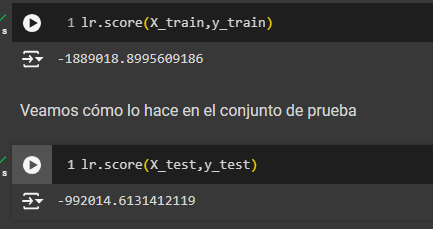

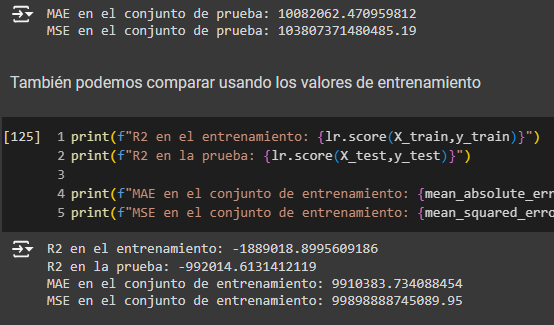

In [ ]:
# @title Texto de título predeterminado


Una pregunta que surge con frecuencia se refiere a la incertidumbre acerca de los parámetros del modelo, ya que estos también son variables aleatorias.

En general, Scikit-Learn no proporciona herramientas para obtener conclusiones acerca de los parámetros internos del modelo: la interpretación de los parámetros del modelo es mucho más una *pregunta de modelaje estadístico* que una pregunta de *aprendizaje automático*. El aprendizaje automático se centra más la *predicción*.

No obstante, si se desea profundizar en el significado de los parámetros del modelo, hay herramientas como las incluidas en el [paquete de Statsmodels de Python](http://statsmodels.sourceforge.net/).

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
"""
X_train_1 = sm.add_constant(X_train)
X_train_1_df = pd.DataFrame(X_train_1, columns=['const']+X_df.columns.to_list())
display(X_train_1_df.head())
results = sm.OLS(y_train, X_train_1_df).fit()
print(results.summary())

"""

# columnas sean numéricas
X_train = X_train.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)
y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)

X_train_1 = sm.add_constant(X_train)#constante modelo de statsmodels

X_train_1 = X_train_1.astype(float)#  datos  tipo float
y_train = y_train.astype(float)

X_train_1 = X_train_1.fillna(X_train_1.mean())
y_train = y_train.fillna(y_train.mean())

display(X_train_1.head())


results = sm.OLS(y_train, X_train_1).fit()# Modelo con OLS
print(results.summary())




,const,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
80,1.0,3.0,2.0,96.3,173.0,65.4,49.4,2370.0,4.0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119,1.0,1.0,2.0,93.7,157.3,63.8,50.8,2128.0,4.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181,1.0,-1.0,4.0,104.5,187.8,66.5,54.1,3151.0,6.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,1.0,0.0,4.0,101.2,176.8,64.8,54.3,2395.0,4.0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95,1.0,1.0,2.0,94.5,165.6,63.8,53.3,2028.0,4.0,97.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     44.58
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.83e-56
Time:                        06:39:34   Log-Likelihood:                -1494.2
No. Observations:                 164   AIC:                             3062.
Df Residuals:                     127   BIC:                             3177.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.377e+04    

**Algunas observaciones**

* `R-squared` nos dice que nuestro modelo explica 93% del cambio en la variable dependiente (el precio del automovil).
* `Adj. R-squared` ajusta el coeficiente `R-squared` tomando en cuenta el número de variables (features).
* Los p-values `P>|t|` nos dice qué tan probable es que el coeficiente de la población haya sido medido por azar. Es decir, pone a prueba la hipótesis nula de que la variable independiente no tiene correlación con la variable dependiente. Hay dos escenarios:
    * El valor es superior al nivel de significancia, no hay asociación entre los cambios en la variable independiente y los cambios en la variable dependiente. En otras palabras, no hay pruebas suficientes para concluir que existe un efecto a nivel de población.
    * Si el valor p de una variable es inferior al nivel de significancia, los datos de la muestra proporcionan pruebas suficientes para rechazar la hipótesis nula de toda la población. Sus datos favorecen la hipótesis de que existe una correlación distinta de cero. Los cambios en la variable independiente están asociados a cambios en la variable dependiente a nivel poblacional. Esta variable es estadísticamente significativa y probablemente merezca la pena añadirla a su modelo de regresión.

## Ejemplo 3: Regularización

La regularización es una técnica de regresión lineal que penaliza la magnitud de los coeficientes de la regresión. Los coeficientes minimizan una suma de cuadrados residual penalizada:

$$\text{min}_w \|Xw - y \|^2+α\|w\|^2$$

El parámetro de complejidad $\alpha>0$ controla la cantidad de contracción: cuanto mayor sea el valor de $\alpha$, mayor será la cantidad de contracción.

Hay tres tipos de regularización en la regresión:

* [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html): Es la descrita anteriormente.
* [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html): Es parecida a la anterior, pero usando la norma L1:
    $$\| w \| _1 = \sum |w_i|$$
* [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet): Combina ambas anteriores.

En esto caso, sólo experimentaremos con la primera y veremos:

1. El efecto en la norma de los coeficientes.
2. El efecto en el rendimiento de la tarea de regresión.

En notebooks posteriores analizaremos un poco más a fondo la regularización.

Repetimos el procedimiento, ya de forma más compacta:

In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/cars-prices.csv'
df = pd.read_csv(url)
df.drop(columns=['car_ID','CarName'],inplace=True)
cols = ['cylindernumber','doornumber']
replacing_dict = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}

for col in cols:
    df[col].replace(replacing_dict,inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
y = df['price'].values

df.drop(columns='price',inplace=True)
X_df = pd.get_dummies(df)
X_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,True,False,False,False,False,False,False,True,False,False
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
X = X_df.values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((164, 45), (164,))
Prueba: ((41, 45), (41,))


In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
X_train = selector.fit_transform(X_train)   # Entrenamos y transformamos el de entrenamiento
X_test = selector.transform(X_test)        # Sólo transformamos el de prueba

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge

lr = Ridge(alpha=2)
lr.fit(X_train,y_train)

print(f"Entrenamiento: {lr.score(X_train,y_train)}")
print(f"Prueba: {lr.score(X_test,y_test)}")

Entrenamiento: 0.9271070378477796
Prueba: 0.8732441104386719


In [ ]:
columns = X_df.columns.to_list()
coefs_dict = dict(zip(columns,lr.coef_))
dict(sorted(coefs_dict.items(),key=lambda x:x[1],reverse=True))

{'enginesize': 2978.987934992568,
 'curbweight': 2274.9953957634793,
 'carwidth': 1263.579417892778,
 'horsepower': 1128.6037331858404,
 'enginetype_rotor': 1127.3564826823574,
 'wheelbase': 970.7416451413253,
 'cylindernumber': 763.4463612159102,
 'symboling': 721.9015188193933,
 'carbody_convertible': 671.9161960813466,
 'highwaympg': 657.1801397914452,
 'enginelocation_rear': 639.2701976471755,
 'fueltype_diesel': 574.4100558409639,
 'fuelsystem_idi': 574.4100558409497,
 'carheight': 553.0069114110282,
 'enginetype_ohc': 502.47347000517334,
 'drivewheel_rwd': 490.79911570614166,
 'peakrpm': 458.3524832876485,
 'doornumber': 269.84343492462455,
 'aspiration_turbo': 244.0835032039167,
 'carbody_sedan': 162.3592774767996,
 'enginetype_ohcf': 82.24050649580033,
 'fuelsystem_1bbl': 64.11376337752232,
 'enginetype_dohcv': 0.3754227006145952,
 'fuelsystem_2bbl': -22.17998944406884,
 'citympg': -86.75700262820529,
 'carbody_hatchback': -100.7486868985643,
 'fuelsystem_spfi': -104.9138140174

¿Qué efecto tiene el parámetro $\alpha$ sobre la magnitud de los coeficientes?

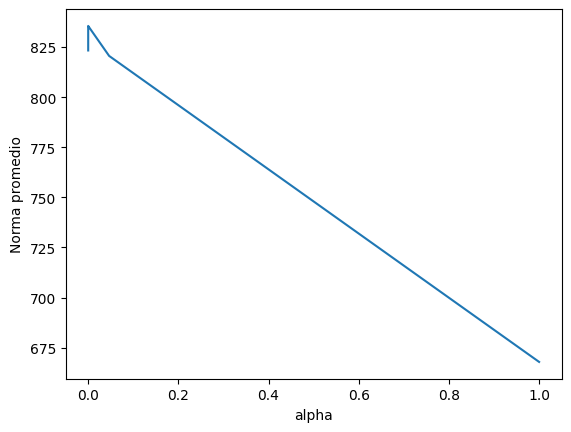

In [ ]:
import matplotlib.pyplot as plt

alphas = np.logspace(-12,0,num=10)
normas = []

for alpha in alphas:
    lr = Ridge(alpha=alpha)
    lr.fit(X_train,y_train)
    normas.append(np.mean(np.abs(lr.coef_)))

plt.figure()
plt.plot(alphas,normas)
plt.xlabel("alpha")
plt.ylabel("Norma promedio")
plt.show()

¿Qué efecto tiene el parámetro $\alpha$ en el score?

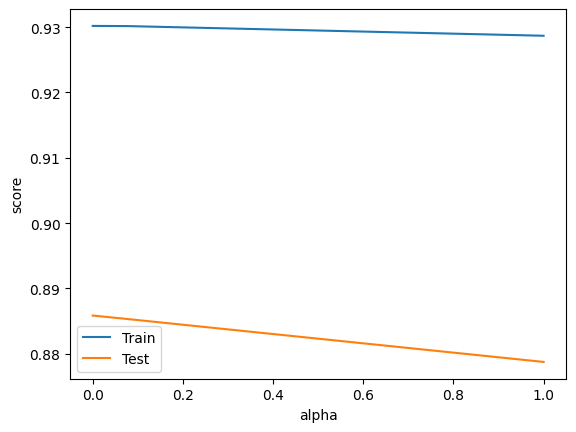

In [ ]:
import matplotlib.pyplot as plt

alphas = np.logspace(-10,0,num=10)
train_scores = []
test_scores = []

for alpha in alphas:
    lr = Ridge(alpha=alpha)
    lr.fit(X_train,y_train)
    train_scores.append(lr.score(X_train,y_train))
    test_scores.append(lr.score(X_test,y_test))

plt.figure()
plt.plot(alphas,train_scores,label="Train")
plt.plot(alphas,test_scores,label="Test")
plt.xlabel("alpha")
plt.ylabel("score")
plt.legend()
plt.show()

Como podemos ver, en este ejemplo concreto, la regularización no beneficia al problema en cuestión de la métrica de rendimiento.

#⭕ Ejercicio

Usaremos un dataset sobre publicidad. Este dataset consta de 200 registros, cada registro consta de las variables.

* TV: dólares de publicidad gastados en TV para un solo producto en un mercado determinado (en miles de dólares)
* Radio: inversión publicitaria en radio
* Newspaper: inversión publicitaria en periódicos
* Sales: ventas de un solo producto en un mercado determinado (en miles de unidades).


In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/advertising.csv'
df = pd.read_csv(url,index_col=0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


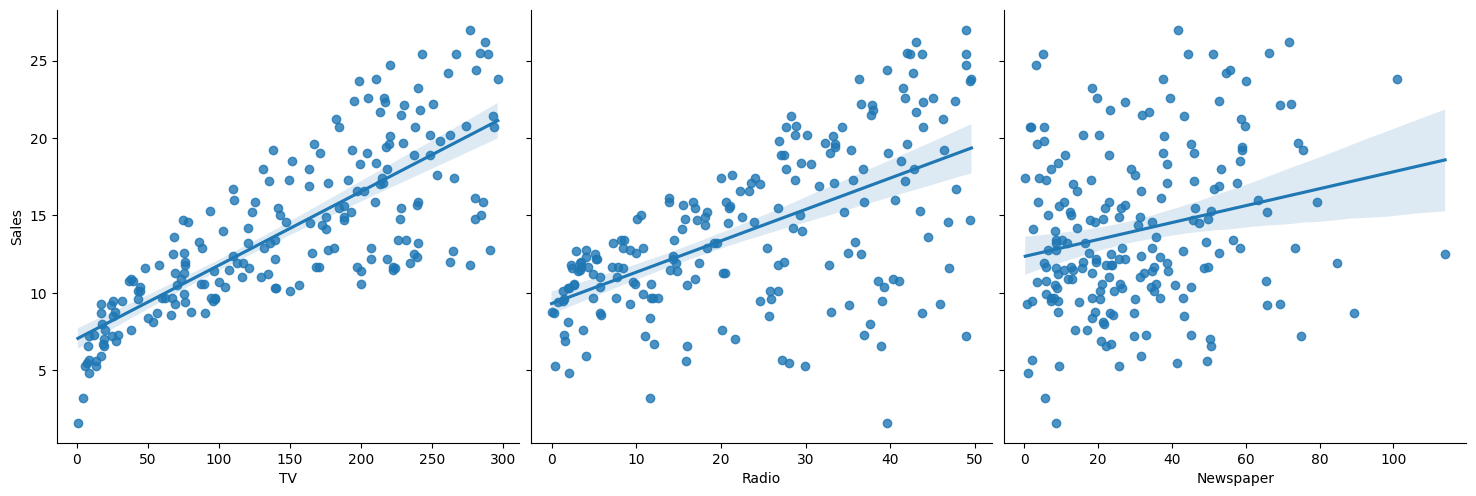

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=1, kind='reg')
plt.show()

Objetivos:

1. Entrenar un modelo de regresión lineal usando el 85% de las instancias, separar el resto para prueba. **No olvides el preprocesamiento**, **cuidado con el data leakage**.
2. Reportar las métricas de rendimiento MAE, MSE en las predicciones con el conjunto de prueba solamente.
3. Con base en la métrica de rendimiento MAE, escoge el mejor modelo de regresión lineal. Es decir, ¿cuál es el menor MAE que puedes obtener en el conjunto de prueba? Junto con este número, reporta los parámetros y la combinación de técnicas que usaste.

Considera las siguientes situaciones en el preprocesamiento:

* ¿Hay valores faltantes? En caso de que sí, recuerda que tienes dos opciones: remover estas instancias o hacer imputación.
* ¿Cuál es el rango de las 3 variables? ¿tienen magnitudes muy diferentes?
* ¿Hay alguna variable que consideres que no es muy relevante?
* Realiza la(s) técnica(s) de preprocesamiento que consideres necesario: selección de features, normalización.

**Prueba varios modelos combinando diferentes técnicas y herramientas de preprocesamiento**, observa su efecto en el rendimiento con la métrica especificada.




In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Dividir el conjunto de datos en entrenamiento (85%) y prueba (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Preprocesamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento
linear_model = LinearRegression() #modelo de regresión lineal
linear_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_model.predict(X_test_scaled)#conjunto de pruebapredicciones

# Calcular métricas de rendimiento para la regresión lineal
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print("Métricas de rendimiento para - regresión lineal - en el conjunto de prueba:")
print("MAE:", mae_linear)
print("MSE:", mse_linear)


poly = PolynomialFeatures(degree=2)#Regresión polinomial
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Entrenamiento
poly_model = LinearRegression() #modelo de regresión polinomial
poly_model.fit(X_train_poly, y_train)


y_pred_poly = poly_model.predict(X_test_poly)#prueba predicciones

#métricas de rendimiento regresión polinomial
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("\nMétricas de rendimiento para la regresión polinomial en el conjunto de prueba:")
print("MAE:", mae_poly)
print("MSE:", mse_poly)

# Comparar ambos modelos
if mae_poly < mae_linear:
    print("\nEl mejor modelo es la regresión polinomial con un MAE de:", mae_poly)

else:
    print("\nEl mejor modelo es la regresión lineal con un MAE de:", mae_linear)



Métricas de rendimiento para - regresión lineal - en el conjunto de prueba:
MAE: 1.3567161076477252
MSE: 2.8540931918021233

Métricas de rendimiento para la regresión polinomial en el conjunto de prueba:
MAE: 0.5049722218800329
MSE: 0.40030359597201043

El mejor modelo es la regresión polinomial con un MAE de: 0.5049722218800329
